<a href="https://colab.research.google.com/github/afraz-rupak/Superstore-Sales-time-series-forecasting/blob/main/Superstore_Sales_advanced_time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents

1. ARIMA Model
2. Facebook Prophet Model
3. LSTM

# 1. ARIMA Model
The ARIMA(p,I,q) model has 3 hyperparameters:
- The order of the AR process, based on autocorrelations between past and
present values, denoted by p
- The order of the MA process, based on correlations between past errors and
present values denoted by q
- The order of integration denoted by I (or d in some notations)
- Additional “I” building block in ARIMA, which stands for automatic differencing of non-stationary time series.
> If a time series is not stationary, you can make it stationary by
applying differencing: replacing the actual values by the difference between the actual
and the previous value.

**Step 1.** Get Data
- Loading the transactions data from sales dataset
- Converting it in datetime format

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
pio.templates.default = "none"


In [ ]:
df = pd.read_csv('superstore sales.csv')
df['Order Date']= pd.to_datetime(df['Order Date'])
df

C:\Users\afraz\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '15/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\afraz\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '22/11/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\afraz\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '13/05/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\afraz\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '27/08/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\afraz\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\tools

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,2016-12-01,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,2016-12-01,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,2016-12-01,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   object        
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [ ]:
data = {'date':df['Order Date'], 
        'transactions':df['Sales']} 
df_trans = pd.DataFrame(data)
#df_trans = df_trans.set_index('Date')
df_trans= df_trans.sort_index()
df_trans

,date,transactions
0,2017-08-11,261.9600
1,2017-08-11,731.9400
2,2017-12-06,14.6200
3,2016-11-10,957.5775
4,2016-11-10,22.3680
...,...,...
9795,2017-05-21,3.7980
9796,2016-12-01,10.3680
9797,2016-12-01,235.1880
9798,2016-12-01,26.3760


**Step 2.** Visualize Data

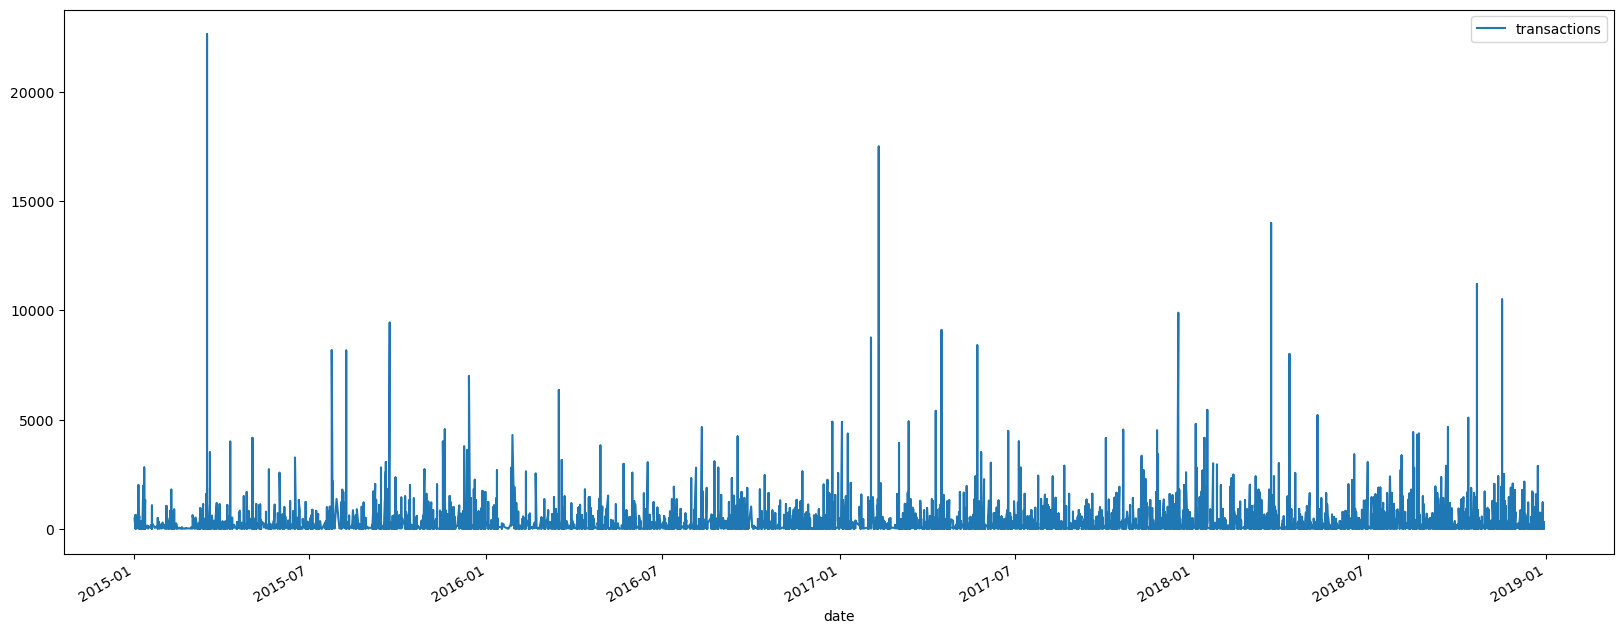

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,8))
df_trans.plot.line(x="date", y="transactions",
                 ax = axes,
#                  rot=0
                )
plt.show()

The chart looks to overwhelming to understand since there are too many data points. It will be easier to group these data, say by week or month. The aggregation will be made by **mean.**

In [ ]:
# Create function to group by the called frequency (W = week, M = month, Y = year)
def grouped(df, key, freq, col):
    """ GROUP DATA WITH CERTAIN FREQUENCY """
    df_grouped = df.groupby([pd.Grouper(key=key, freq=freq)]).agg(mean = (col, 'mean'))
    df_grouped = df_grouped.reset_index()
    return df_grouped

df_grouped_trans_m = grouped(df_trans, 'date', 'M', 'transactions')
df_grouped_trans_w = grouped(df_trans, 'date', 'W', 'transactions')
df_grouped_trans_w.head()

,date,mean
0,2015-01-04,186.129267
1,2015-01-11,258.833349
2,2015-01-18,325.164100
3,2015-01-25,140.570182
4,2015-02-01,128.688375


Text(0.5, 1.0, 'Average Daily Sales per Week')

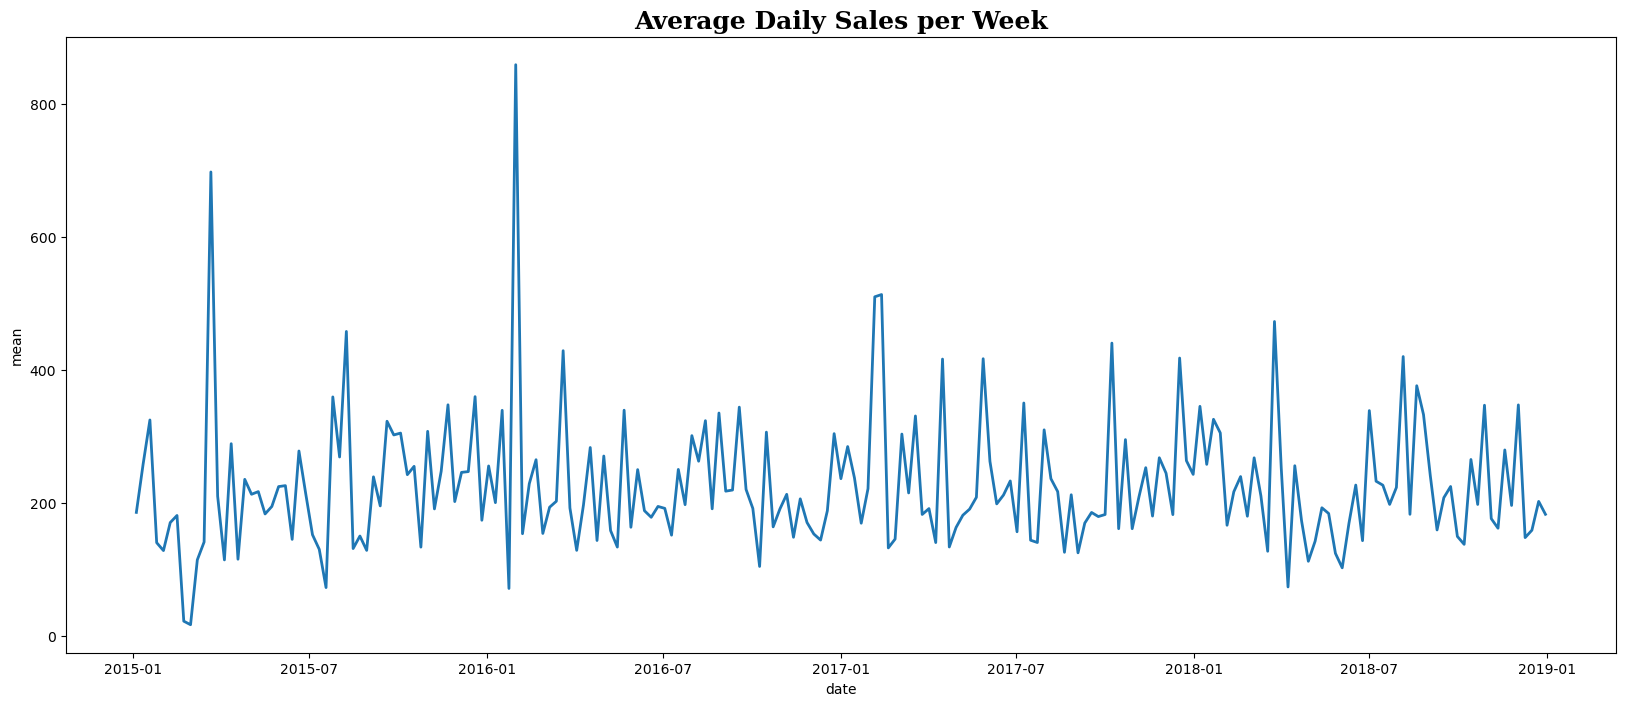

In [ ]:
fig = plt.figure(figsize = (20, 8))
sns.lineplot(x = df_grouped_trans_w['date'], y= df_grouped_trans_w['mean'], linewidth=2, )
plt.title("Average Daily Sales per Week",
          fontsize = 18,
          fontweight = 'bold',
          fontfamily = 'serif',
          loc = 'center')

Text(0.5, 1.0, 'Average Daily Sales per Month')

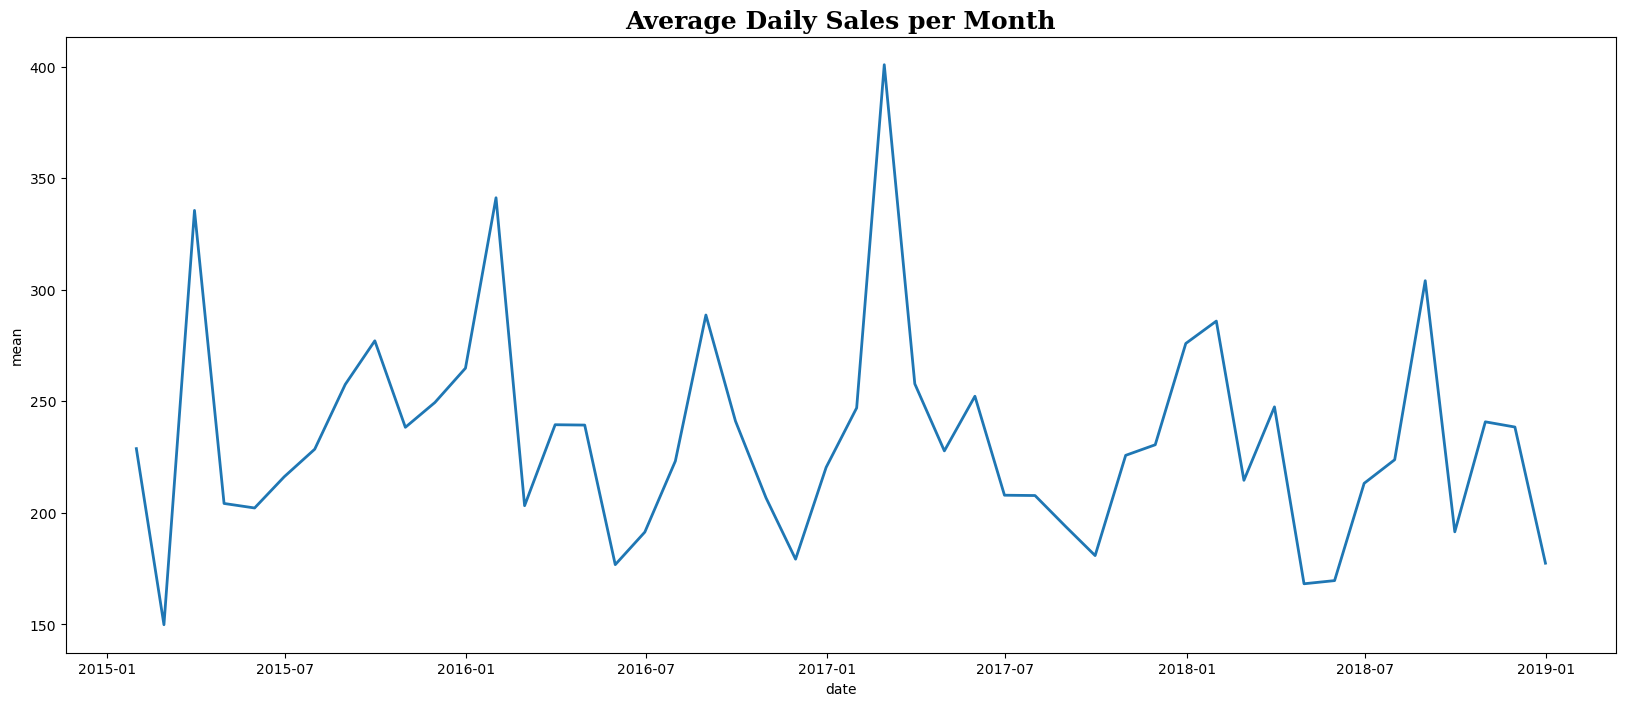

In [ ]:
fig = plt.figure(figsize = (20, 8))
sns.lineplot(x = df_grouped_trans_m['date'], y= df_grouped_trans_m['mean'], linewidth=2, )
plt.title("Average Daily Sales per Month",
          fontsize = 18,
          fontweight = 'bold',
          fontfamily = 'serif',
          loc = 'center')

**Step 3.** Split to Train and Test data

In [ ]:
print(df_grouped_trans_m.shape)

# first 36 rows as training
train = df_grouped_trans_m[0:36]

# remaining rows for testing
test = df_grouped_trans_m[36:]

print(train.shape, test.shape)

(48, 2)
(36, 2) (12, 2)


In [ ]:
train.head()

,date,mean
0,2015-01-31,228.795667
1,2015-02-28,149.862905
2,2015-03-31,335.575727
3,2015-04-30,204.215008
4,2015-05-31,202.195137


In [ ]:
test

,date,mean
36,2018-01-31,285.966943
37,2018-02-28,214.600146
38,2018-03-31,247.511999
39,2018-04-30,168.218736
40,2018-05-31,169.636707
41,2018-06-30,213.240216
42,2018-07-31,223.828944
43,2018-08-31,304.067677
44,2018-09-30,191.500953
45,2018-10-31,240.813096


**Step 4.** ARIMA model

- `auto_arima()` function will be used to automatically select the best parameters for an ARIMA model. It takes several parameters to set a range of values for p, d, q, P, D, Q that the function will explore. For example, `start_p=1`, `start_q=1` and `max_p=3`, `max_q=3` are set as the range for p and q.
- The `auto_arima()` model will use the `stepwise=True` option to fit the model iteratively and improve the model at each step.
- The fitted model is then stored in the `model_fit` variable and the summary of the model is printed.
- Finally, the code uses the `predict()` function of the fitted model to forecast the next 'n' periods of the time series.

In [ ]:
#pip install pmdarima --quiet

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Run combinations of ARIMA(p,d,q)
model_fit = auto_arima(train['mean'],
                       m=12,
                       d=0,
                       D=0,
                       max_order=None,                       
                       max_p=7,
                       max_q=7,
                       max_d=2,
                       max_P=4,
                       max_Q=4,
                       max_D=2,
                       maxiter = 50,
                       alpha = 0.05,
                       n_jobs = -1,
                       seasonal=True,
                       trace=True,
                       error_action='ignore',  
                       suppress_warnings=True, 
                       stepwise=True
                      )

model_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=393.492, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=385.501, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=389.334, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=389.301, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=499.176, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=387.501, Time=0.02 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=387.493, Time=0.02 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=389.493, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=387.337, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=387.321, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=389.326, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 0.682 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:                        SARIMAX   Log Likelihood                -190.750
Date:                Thu, 02 Feb 2023   AIC                            385.501
Time:                        01:33:15   BIC                            388.668
Sample:                             0   HQIC                           386.606
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    236.4526     10.282     22.997      0.000     216.300     256.605
sigma2      2343.4127    475.394      4.929      0.000    1411.657    3275.168
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                18.64
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               1.56   Skew:                             1.30
Prob(H) (two-sided):                  0.45   Kurtosis:                         5.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The best ARIMA model that has the lowest AIC is as follows:

In [ ]:
model_fit

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

**Step 5.** Forecasts on training data given the optimal parameters from **auto_arima**

<AxesSubplot: >

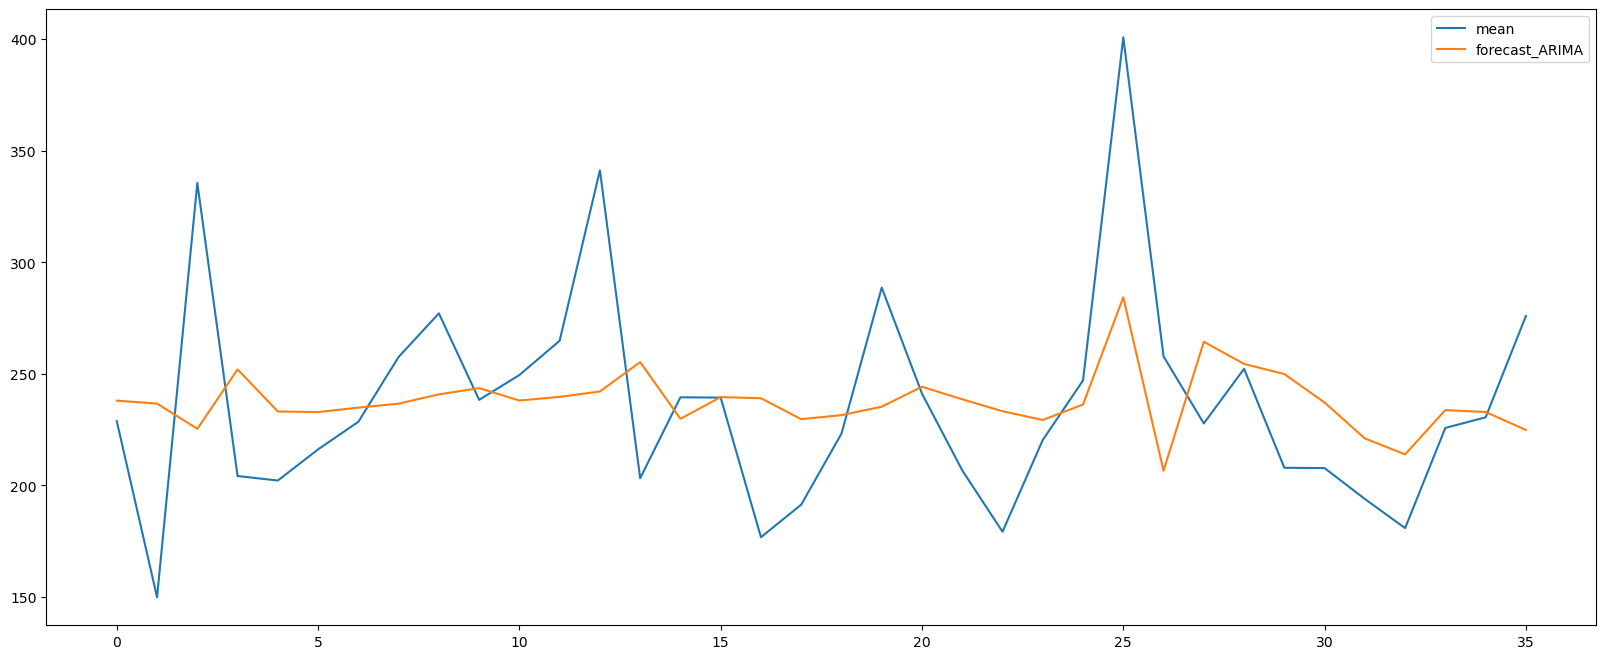

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the ARIMA model
model_ARIMA = ARIMA(train['mean'],
              order=(1,0,0),
              seasonal_order=(2, 0, 0, 12)
            )

# Fit the model
model_ARIMA = model_ARIMA.fit()

train_forecast = train.copy()
test_forecast = test.copy()

train_forecast['forecast_ARIMA'] = model_ARIMA.predict()
train_forecast[['mean','forecast_ARIMA']].plot(figsize=(20,8))

**Step 6.** Forecast on testing data

<AxesSubplot: >

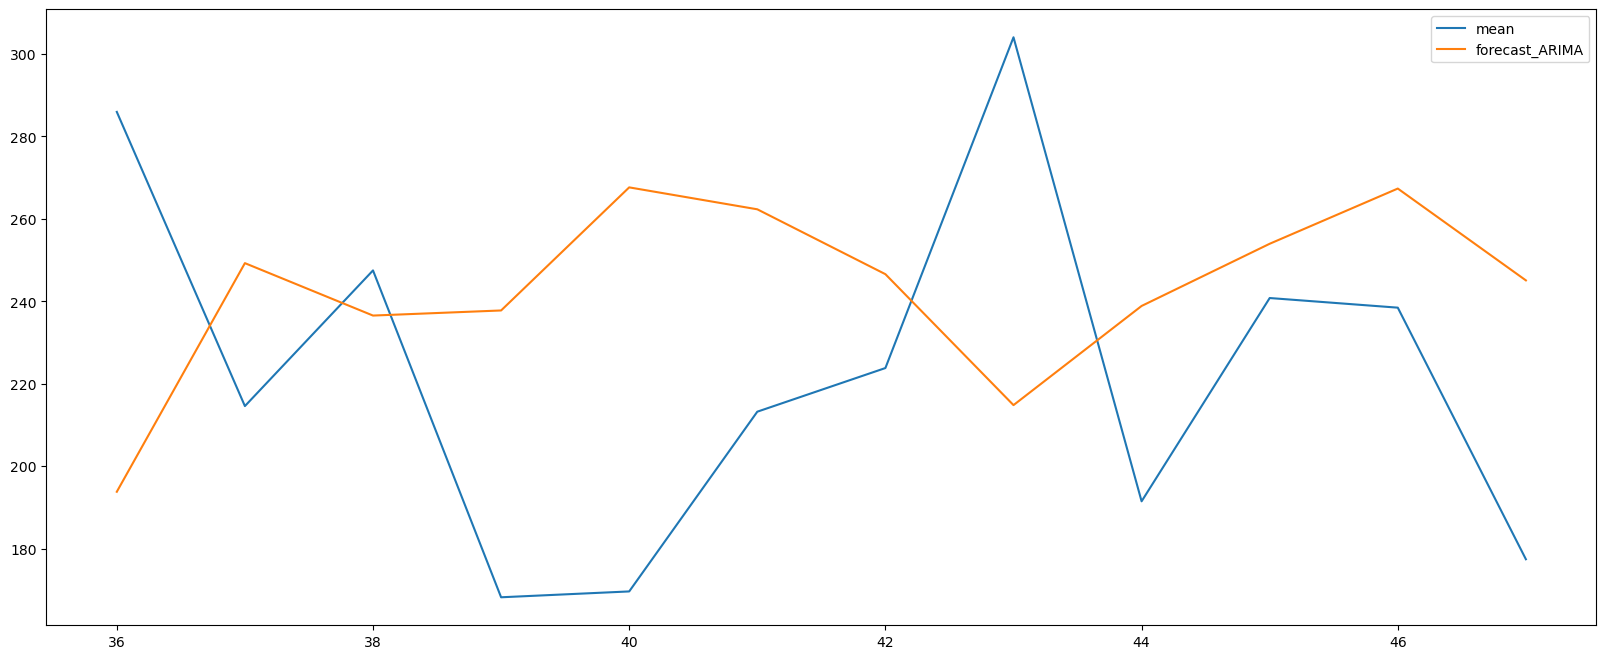

In [ ]:
# Forecast and compare against test data

# start date
start = len(train)

# End date
end = len(train)+len(test)-1

test_forecast['forecast_ARIMA'] = model_ARIMA.predict(start=start, end=end, )
test_forecast[['mean','forecast_ARIMA']].plot(figsize=(20,8))

To evaluate the performance of the ARIMA model, the **RMSE** and **MAE** can be computed and these shall serve as the benchmark for other models.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("RMSE of Auto ARIMA:", np.sqrt(mean_squared_error(test_forecast['mean'], test_forecast['forecast_ARIMA'])))
print("MAE of Auto ARIMA:", mean_absolute_error(test_forecast['mean'], test_forecast['forecast_ARIMA']))

RMSE of Auto ARIMA: 59.850464242236214
MAE of Auto ARIMA: 51.96433921616227


# 2. Facebook Prophet

- Both are powerful tools for time series forecasting, but have different strengths and weaknesses.
- Prophet is a more user-friendly and flexible model than ARIMA, and it can handle missing data, seasonality, and changepoints automatically. It also provides clear visualizations of the model components.

- On the other hand, ARIMA requires more manual tuning of the model parameters and is more sensitive to outliers. It also requires a deeper understanding of the underlying statistical concepts and can be more difficult to interpret. However, ARIMA can be more flexible as it can be extended to SARIMAX model that allows the addition of exogenous variables.

- It's important to note that the performance of the model depends on the nature of the data and the task at hand. Both Prophet and ARIMA can be used to achieve good performance on time series forecasting problems, but it's important to try multiple models and techniques, evaluate their performance, and select the best one for your specific dataset.

In [ ]:
from prophet import Prophet

Rename column names to 'ds' and 'y'. This is required.

In [ ]:
train_fb = train.copy()
test_fb = test.copy()

train_fb.columns = ['ds','y']
test_fb.columns = ['ds','y']

train_fb.head()

,ds,y
0,2015-01-31,228.795667
1,2015-02-28,149.862905
2,2015-03-31,335.575727
3,2015-04-30,204.215008
4,2015-05-31,202.195137


There are two other great plots available when using the Prophet model. The first
one is showing the forecast against the observed data points for the past and future data.

01:36:59 - cmdstanpy - INFO - Chain [1] start processing
01:36:59 - cmdstanpy - INFO - Chain [1] done processing


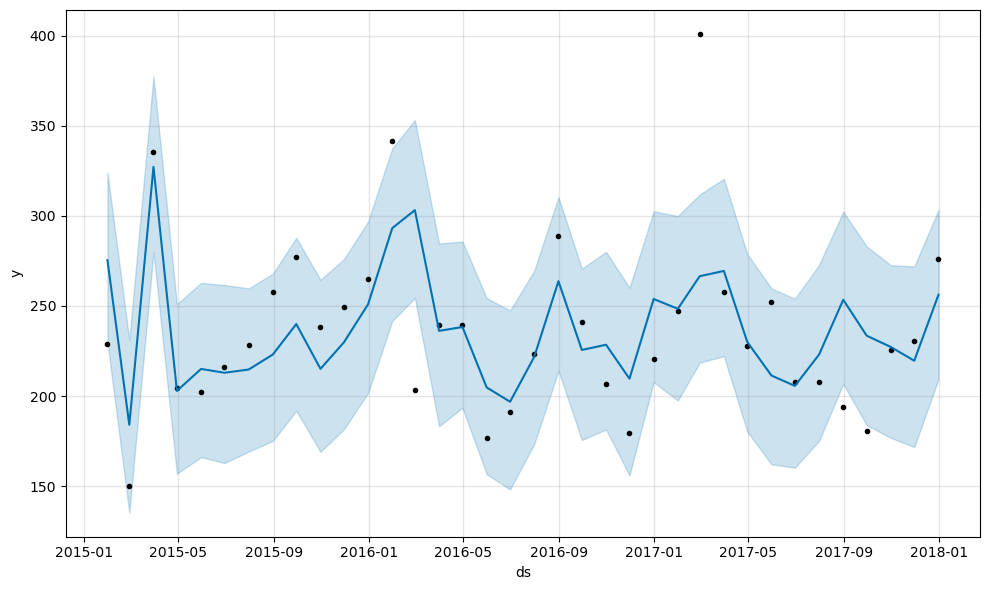

In [ ]:
model_prophet = Prophet()
model_prophet.fit(train_fb)

forecast = model_prophet.predict()
fig = model_prophet.plot(forecast)

The second plot that you can obtain from the Prophet model is a decomposition of
the different impacts of the model. This means that the decomposition can show you the
impact of the different seasonalities at each time step.

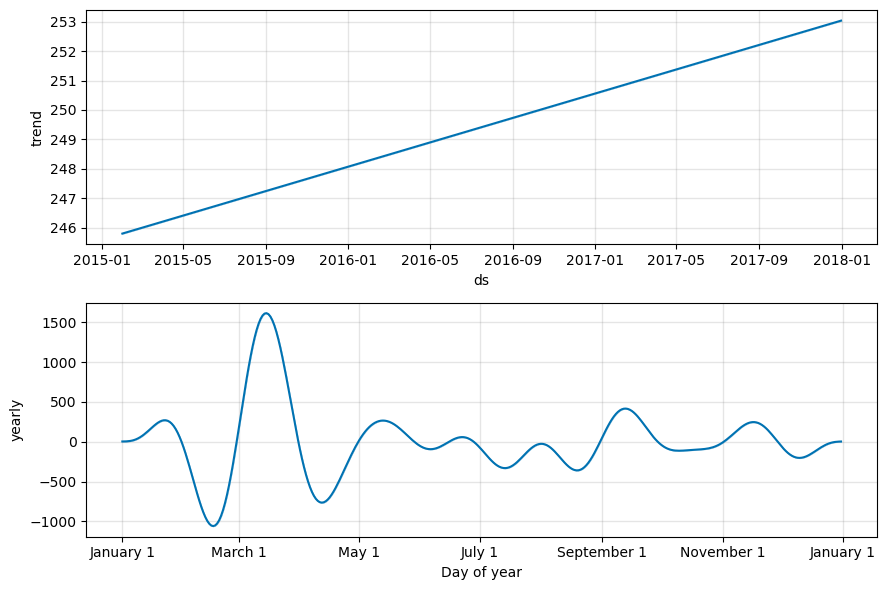

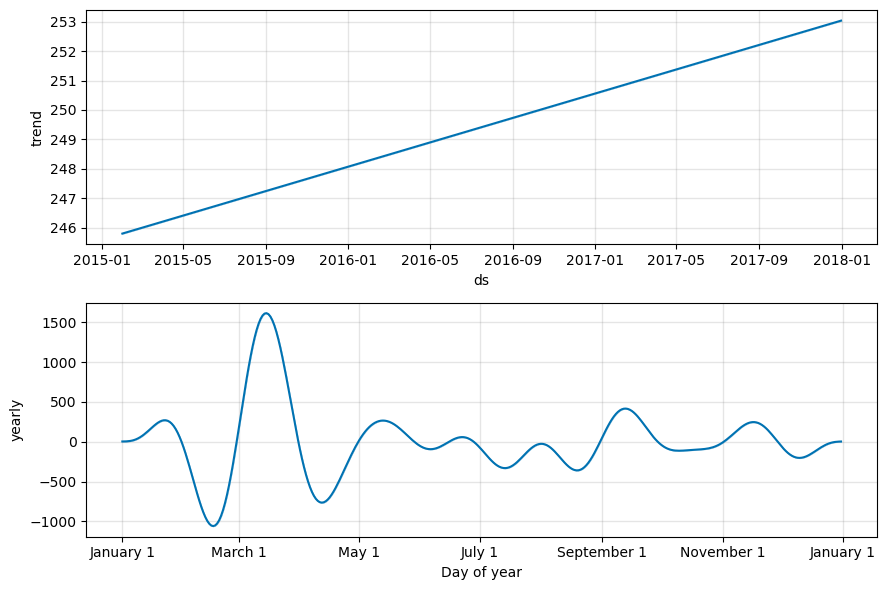

In [ ]:
forecast = model_prophet.predict(train_fb)
model_prophet.plot_components(forecast)

<AxesSubplot: >

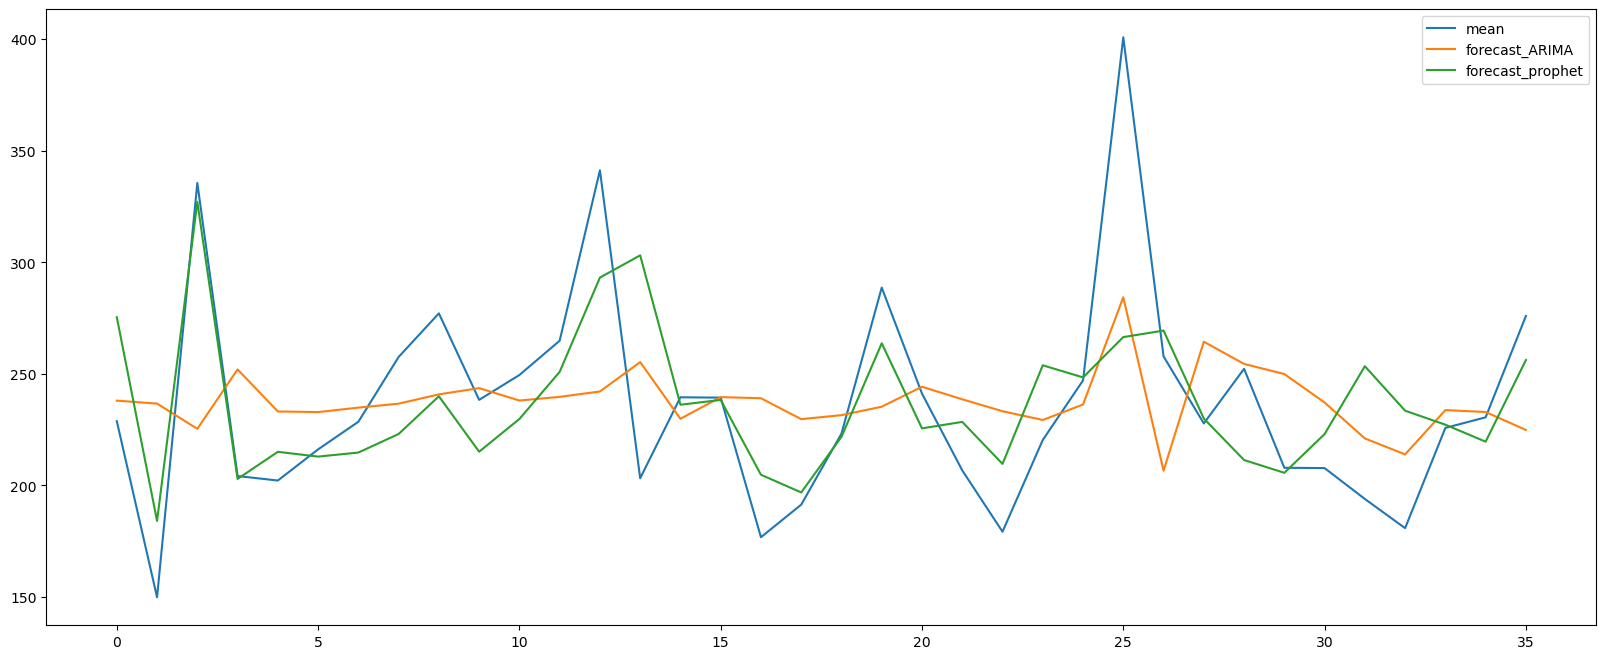

In [ ]:
train_forecast['forecast_prophet'] = forecast['yhat']
train_forecast[['mean', 'forecast_ARIMA','forecast_prophet']].plot(figsize=(20,8))

<AxesSubplot: >

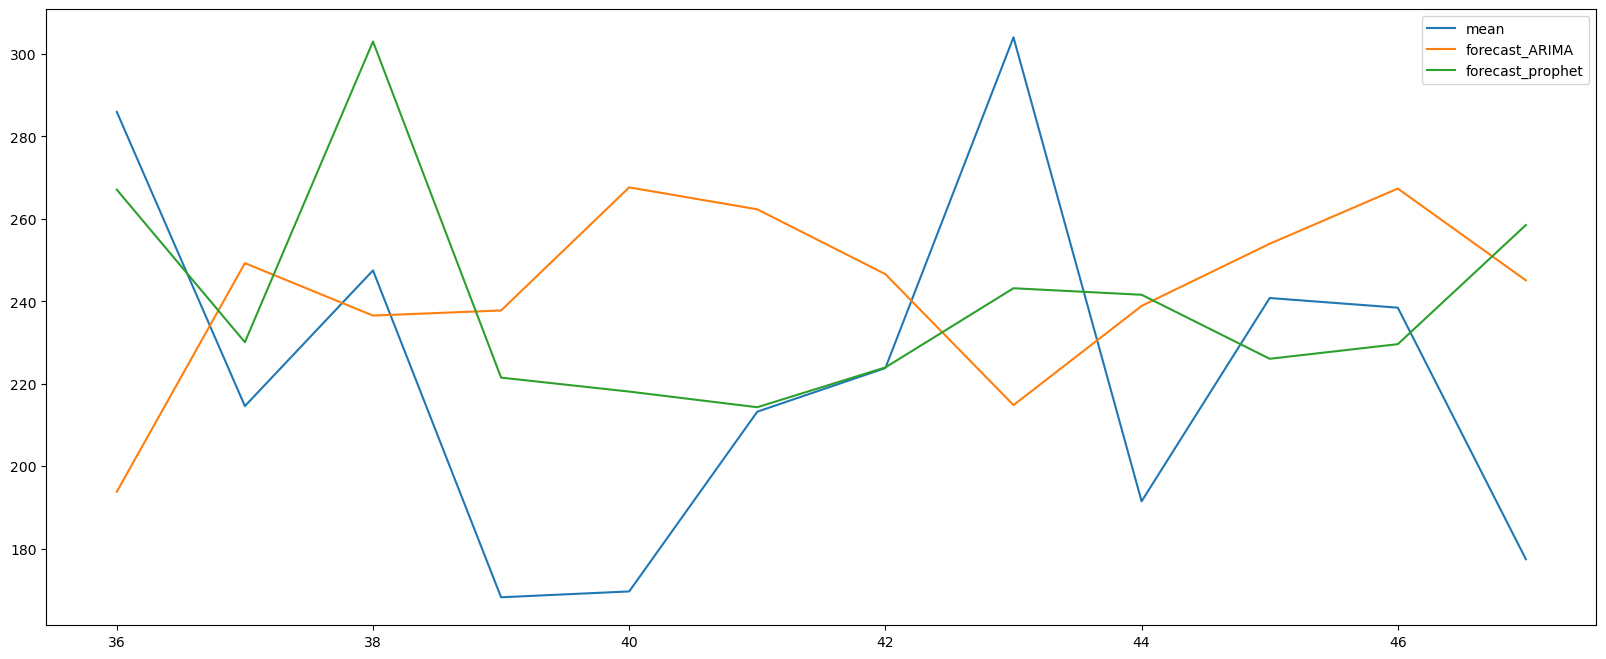

In [ ]:
future_data = model_prophet.make_future_dataframe(periods=20, freq='M')
forecast = model_prophet.predict(future_data)

test_forecast['forecast_prophet'] = forecast[36:]['yhat']
test_forecast[['mean','forecast_ARIMA', 'forecast_prophet']].plot(figsize=(20,8))

To compare the errors between ARIMA vs Facebook Prophet model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("RMSE of Auto ARIMA:", np.sqrt(mean_squared_error(test_forecast['mean'], test_forecast['forecast_ARIMA'])))
print("MAE of Auto ARIMA:", mean_absolute_error(test_forecast['mean'], test_forecast['forecast_ARIMA']))

print("---------------------------------------------\nRMSE of Facebook Prophet:", np.sqrt(mean_squared_error(test_forecast['mean'], test_forecast['forecast_prophet'])))
print("MAE of Facebook Prophet:", mean_absolute_error(test_forecast['mean'], test_forecast['forecast_prophet']))

RMSE of Auto ARIMA: 59.850464242236214
MAE of Auto ARIMA: 51.96433921616227
---------------------------------------------
RMSE of Facebook Prophet: 42.77758498734532
MAE of Facebook Prophet: 34.04749068236175


**Insights:**

Although Facebook Prophet performed better in the training data, it was revealed to perform poorly when validated on testing data. Upon observation, the declining trend made the deviation even worse in the following years. Overfitting may be a concern here.  

# 3. Long Short-Term Memory (LSTMs)

Long Short-Term Memory (LSTM) networks are a type of Recurrent Neural Network (RNN) that are particularly well suited for time series forecasting. LSTMs are able to capture long-term dependencies in time series data by using memory cells that can retain information for extended periods of time.

LSTMs take in the historical time series data as input, and use this data to learn the underlying patterns and relationships in the data. Once trained, the LSTM can then be used to make predictions about future events in the time series.

First, load the necessary libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator

Then, load the data and prepare it for the LSTM model. This typically involves splitting the data into training and testing sets, scaling the data, and reshaping it into the format that the LSTM model expects. Full code are copied and pasted from this Github script https://github.com/nachi-hebbar/Time-Series-Forecasting-LSTM/blob/main/RNN_Youtube.ipynb

In [ ]:
train = train.set_index('date')
test = test.set_index('date')

In [ ]:
train.reset_index()

scaler = MinMaxScaler()
train.head(), test.head()

(                  mean
 date                  
 2015-01-31  228.795667
 2015-02-28  149.862905
 2015-03-31  335.575727
 2015-04-30  204.215008
 2015-05-31  202.195137,
                   mean
 date                  
 2018-01-31  285.966943
 2018-02-28  214.600146
 2018-03-31  247.511999
 2018-04-30  168.218736
 2018-05-31  169.636707)

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.31444938],
       [0.        ],
       [0.73983577],
       [0.21652587],
       [0.20847918],
       [0.26410405],
       [0.31341529],
       [0.42912387],
       [0.50699284],
       [0.35254446]])

In [ ]:
# We do the same thing, but now instead for 12 months
n_input = 4
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit(generator, epochs=50)

Epoch 1/50
32/32 [==============================] - 3s 11ms/step - loss: 0.0825
Epoch 2/50
32/32 [==============================] - 0s 12ms/step - loss: 0.0370
Epoch 3/50
32/32 [==============================] - 0s 11ms/step - loss: 0.0393
Epoch 4/50
32/32 [==============================] - 0s 12ms/step - loss: 0.0382
Epoch 5/50
32/32 [==============================] - 0s 11ms/step - loss: 0.0384
Epoch 6/50
32/32 [==============================] - 0s 11ms/step - loss: 0.0361
Epoch 7/50
32/32 [==============================] - 0s 10ms/step - loss: 0.0356
Epoch 8/50
32/32 [==============================] - 0s 12ms/step - loss: 0.0349
Epoch 9/50
32/32 [==============================] - 0s 12ms/step - loss: 0.0348
Epoch 10/50
32/32 [==============================] - 0s 11ms/step - loss: 0.0359
Epoch 11/50
32/32 [==============================] - 0s 13ms/step - loss: 0.0346
Epoch 12/50
32/32 [==============================] - 0s 13ms/step - loss: 0.0348
Epoch 13/50
32/32 [==================

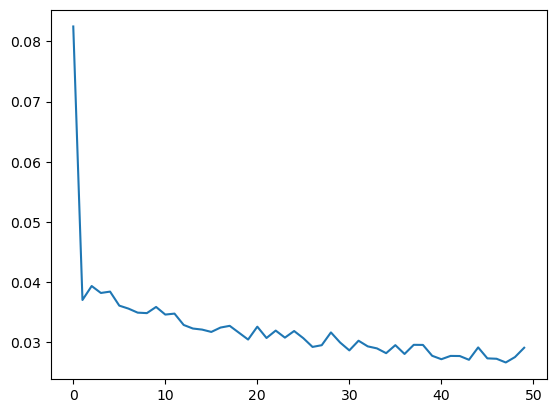

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-4:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)

1/1 [==============================] - 0s 150ms/step


array([[0.4556103]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.54220616])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 18ms/step


In [ ]:
test_predictions

[array([0.4556103], dtype=float32),
 array([0.42584255], dtype=float32),
 array([0.4080102], dtype=float32),
 array([0.39884734], dtype=float32),
 array([0.4021553], dtype=float32),
 array([0.40745005], dtype=float32),
 array([0.4115766], dtype=float32),
 array([0.4130886], dtype=float32),
 array([0.41272742], dtype=float32),
 array([0.41175145], dtype=float32),
 array([0.41097698], dtype=float32),
 array([0.4106696], dtype=float32)]

In [ ]:
test.head()

,mean
date,
2018-01-31,285.966943
2018-02-28,214.600146
2018-03-31,247.511999
2018-04-30,168.218736
2018-05-31,169.636707


<AxesSubplot: xlabel='date'>

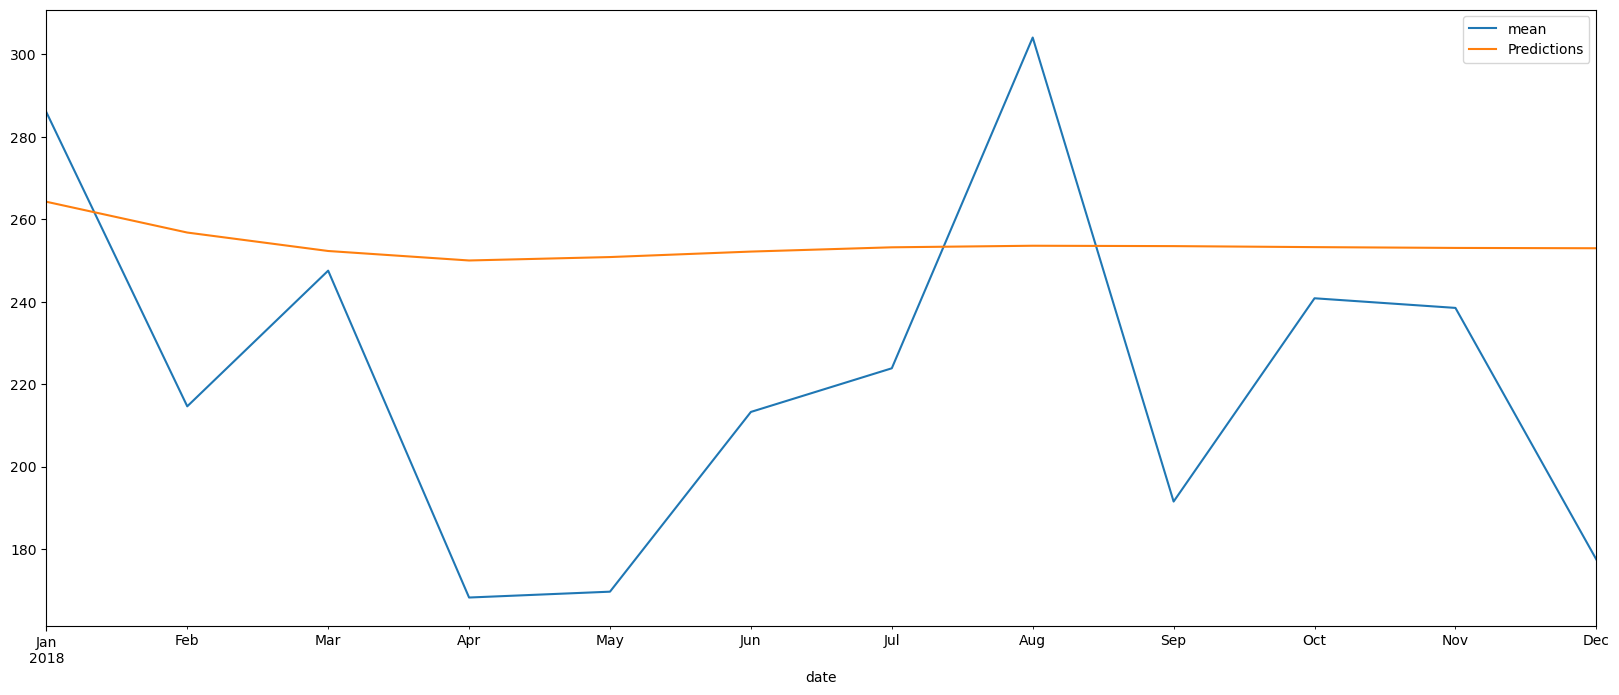

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions
test.plot(figsize=(20,8))